In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../')

from shocksgo import generate_stellar_fluxes, generate_solar_fluxes

abbr


Text(0,0.5,'Relative flux')

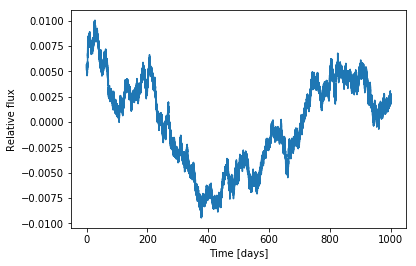

In [28]:
from astropy.constants import M_sun, R_sun, L_sun
import astropy.units as u

times, fluxes, kernel = generate_solar_fluxes(duration=1000*u.day)

plt.plot(times.to(u.day).value, fluxes)
plt.xlabel('Time [days]')
plt.ylabel('Relative flux')

Text(0,0.5,'Power [flux$^2$/Hz]')

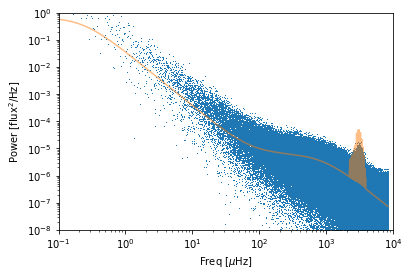

In [29]:
from scipy.signal import periodogram

f, p = periodogram(fluxes, fs=1/60)

plt.loglog(f * 1e6, p, ',')
plt.loglog(f * 1e6, 2*np.pi*kernel.get_psd(2 * np.pi * f), alpha=0.5)
plt.xlim([1e-1, 1e4])
plt.ylim([1e-8, 1e0])
plt.xlabel('Freq [$\mu$Hz]')
plt.ylabel('Power [flux$^2$/Hz]')

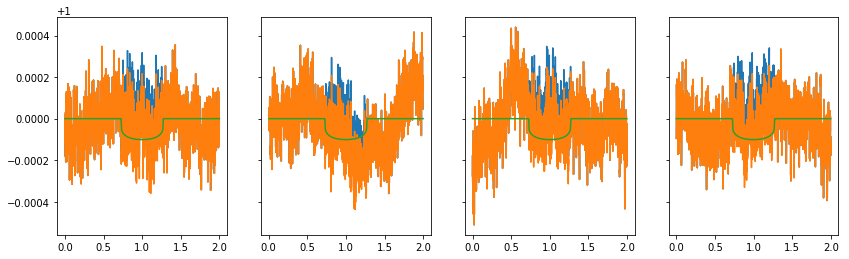

In [31]:
from astropy.constants import M_sun, R_sun, L_sun, R_earth

from batman import TransitModel, TransitParams
params = TransitParams()
params.per = 365.25
params.t0 = 1.0
params.inc = 90
params.w = 90
params.ecc = 0
params.u = [0.4, 0.2]
params.limb_dark = 'quadratic'
params.a = float(1*u.AU/R_sun)
params.rp = float(R_earth/R_sun)

fig, ax = plt.subplots(1, 4, figsize=(14, 4), sharey=True)
for i in range(4):
#     times, fluxes, kernel = generate_stellar_fluxes(duration=2*u.day, M=1.0 * M_sun, 
#                                                     T_eff=5777 * u.K, 
#                                                     R=1.0 * R_sun, L=L_sun)
    times, fluxes, kernel = generate_solar_fluxes(duration=2*u.day)

    fluxes += 1
    
    model = TransitModel(params, times.to(u.day).value)
    lc = model.light_curve(params)

    ax[i].plot(times.to(u.day).value, fluxes)

    ax[i].plot(times.to(u.day).value, lc * fluxes)

    ax[i].plot(times.to(u.day).value, lc)
#.xlabel('Time [days]')
#.ylabel('Relative flux')

In [12]:
len(times)

2880

In [13]:
from astropy.io import fits

data = fits.getdata('../data/VIRGO_1min_0083-7404.fits.gz', cache=False)

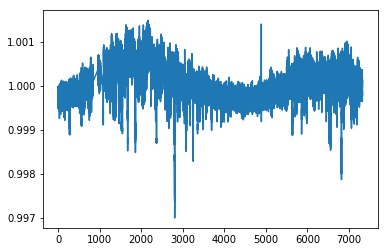

In [14]:
virgo_fluxes = data[data != -99]/np.median(data[data != -99])
virgo_times = np.arange(len(data))[data != -99] / 60 / 24

plt.plot(virgo_times, virgo_fluxes)

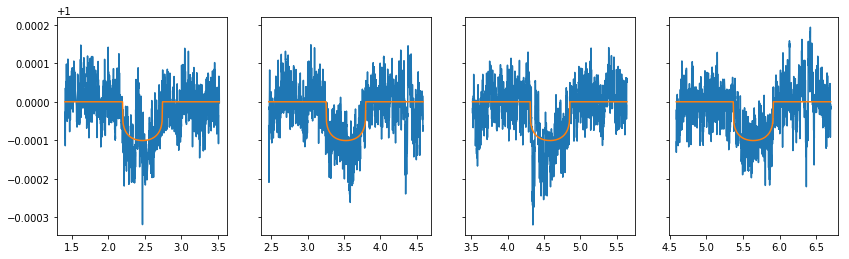

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(14, 4), sharey=True)

one_day = 24 * 60

for i in range(4):
    times, fluxes = virgo_times[one_day*(i+1):one_day*(i+3)].copy(), virgo_fluxes[one_day*(i+1):one_day*(i+3)].copy()
    params.t0 = times.mean()
    fluxes /= np.median(fluxes)
    model = TransitModel(params, times)
    lc = model.light_curve(params)

    ax[i].plot(times, lc*fluxes)
    ax[i].plot(times, lc)
plt.show()